To test our ability to detect changes in phase, we compare utc times of total tweets in September vs December. Since most places practice DST, there should be a 1 hour shift in time of tweets.

http://dsp.stackexchange.com/questions/509/what-effect-does-a-delay-in-the-time-domain-have-in-the-frequency-domain

In [1]:
source("C:/Users/Tom Work/PycharmProjects/twipsy-lite/ts.R")


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 



In [10]:
sept_key = ts(preprocessing('E:/summary/control/sept/sept_keyword.csv', 'E:/summary/control/sept/sept_total.csv')$series, frequency=24)

 [1] 412 413 414 415 416 417 418 419 420 421 480 481 482 483 484 485 486 490 491
[20] 492


In [3]:
sept_tot = ts(preprocessing('E:/summary/control/sept/sept_total.csv', 'E:/summary/control/sept/sept_total.csv')$total[25:696], frequency=24)

 [1] 412 413 414 415 416 417 418 419 420 421 480 481 482 483 484 485 486 490 491
[20] 492


In [49]:
june_key = ts(preprocessing('E:/summary/control/june/june_keyword.csv', 'E:/summary/control/june/june_total.csv')$series, frequency=24)
june_tot = ts(preprocessing('E:/summary/control/june/june_total.csv', 'E:/summary/control/june/june_total.csv')$series[49:(672)], frequency=24)

[1]   9  10  11  33  34  35 321 322
[1]   9  10  11  33  34  35 321 322


In [51]:
june_loc = ts(preprocessing('E:/summary/june_total.csv', 'E:/summary/june_total.csv')$series[49:(672)], frequency=24)

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


utc time of december data. Lots of missing data so we only look at the first few days.

In [5]:
dec_tot = ts(preprocessing('E:/summary/control/dec/dec_total.csv', 'E:/summary/control/dec/dec_total.csv')$total, frequency=24)

  [1] 125 126 127 128 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 [19] 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 [37] 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 [55] 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 [73] 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 284
 [91] 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302
[109] 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320
[127] 321 322 323 324 325 326 327 328 329 330 331 334 335 336 337 338 339 340
[145] 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358
[163] 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376
[181] 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394
[199] 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412
[217] 413 414 415 416 417 418 419 420 421 422 423 424 425 426 42

6 days starting from the first Wednesday of each month. Black is December, red is September. There is a visible shift due to DST.

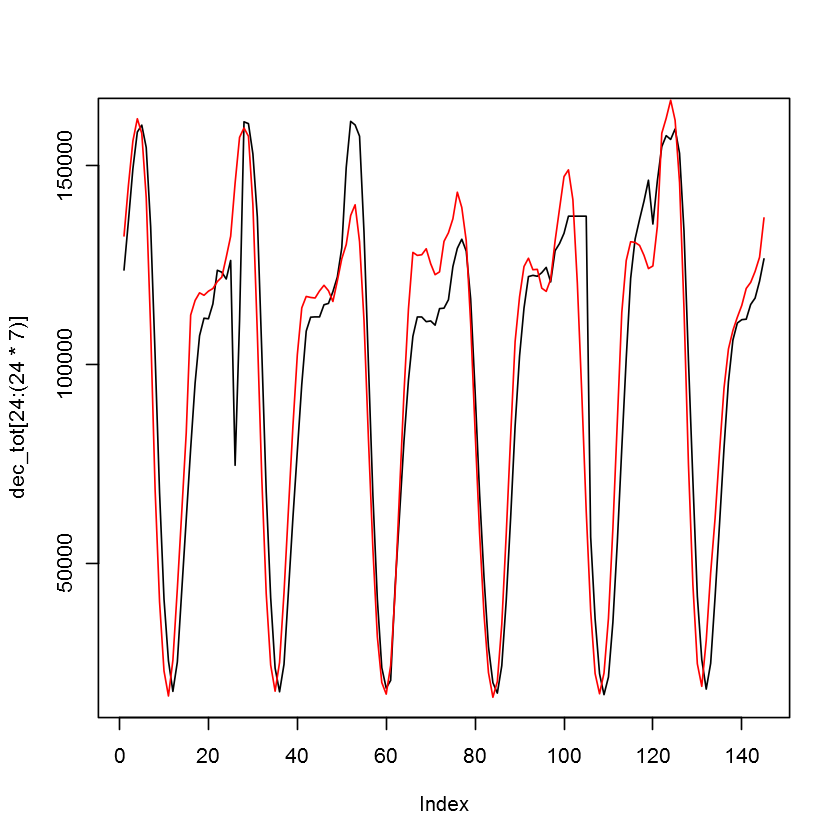

In [18]:
plot(dec_tot[24:(24*7)], type='l')
lines(sept_tot[24:(24*7)], col='red')

In [29]:
sept_days = split_by_day(sept_tot[24:(24*7)])
dec_days = split_by_day(dec_tot[24:(24*7)])
combined = cbind(sept_days, dec_days)

Phase of a specific frequency basis vector from DFT.

In [96]:
phase_dist <- function(freq){
    # gives dft phase distance function at a frequency
    return (function(ts1, ts2){
        # phase of freq from fft
        f1 = fft(ts1)[freq+1]
        f2 = fft(ts2)[freq+1]
        return (abs(Arg(f1/f2))/(2*pi))
        })
    
}

In [24]:
dissimilarity <- function(m_ts, f){
    # calc dissimilarity matrix of list of time series given a distance function
    n = ncol(m_ts)
    mdiss = matrix(nrow=n, ncol=n)
    for (i in 1:n){
        for (j in 1:n){
            mdiss[i, j] = f(m_ts[,i], m_ts[,j])
        }
    }
     return (mdiss)       
}

In [27]:
library(TSclust)

Loading required package: pdc
Loading required package: cluster


In [97]:
diss = dissimilarity(as.matrix(combined), phase_dist(1))

Phase shift in hours between days dissimilarity matrix. We have first 6 days in sept then first 6 days in dec.

In [98]:
diss*24

0.0000000,0.0995464,0.2801948,0.1579170,0.1899111,0.5033878,1.1442974,1.0847668,1.2673467,0.6227230,1.3007978,1.2534540
0.09954640,0.00000000,0.37974116,0.05837060,0.09036466,0.40384137,1.04475095,0.98522038,1.16780032,0.52317657,1.20125139,1.15390759
0.2801948,0.3797412,0.0000000,0.4381118,0.4701058,0.7835825,1.4244921,1.3649615,1.5475415,0.9029177,1.5809925,1.5336487
0.15791700,0.05837060,0.43811175,0.00000000,0.03199406,0.34547078,0.98638036,0.92684978,1.10942972,0.46480598,1.14288079,1.09553699
0.18991106,0.09036466,0.47010582,0.03199406,0.00000000,0.31347672,0.95438630,0.89485572,1.07743566,0.43281192,1.11088673,1.06354293
0.5033878,0.4038414,0.7835825,0.3454708,0.3134767,0.0000000,0.6409096,0.5813790,0.7639589,0.1193352,0.7974100,0.7500662
1.144297e+00,1.044751e+00,1.424492e+00,9.863804e-01,9.543863e-01,6.409096e-01,2.114837e-20,5.953058e-02,1.230494e-01,5.215744e-01,1.565004e-01,1.091566e-01
1.08476678,0.98522038,1.36496153,0.92684978,0.89485572,0.58137900,0.05953058,0.00000000,0.18257994,0.46204380,0.21603101,0.16868721
1.26734672,1.16780032,1.54754148,1.10942972,1.07743566,0.76395895,0.12304937,0.18257994,0.00000000,0.64462375,0.03345107,0.01389273
0.6227230,0.5231766,0.9029177,0.4648060,0.4328119,0.1193352,0.5215744,0.4620438,0.6446237,0.0000000,0.6780748,0.6307310
1.30079779,1.20125139,1.58099255,1.14288079,1.11088673,0.79741002,0.15650044,0.21603101,0.03345107,0.67807482,0.00000000,0.04734380


Clustering based on this matrix successfully seperates them into groups of september and december, except for one day in december which had missing data.

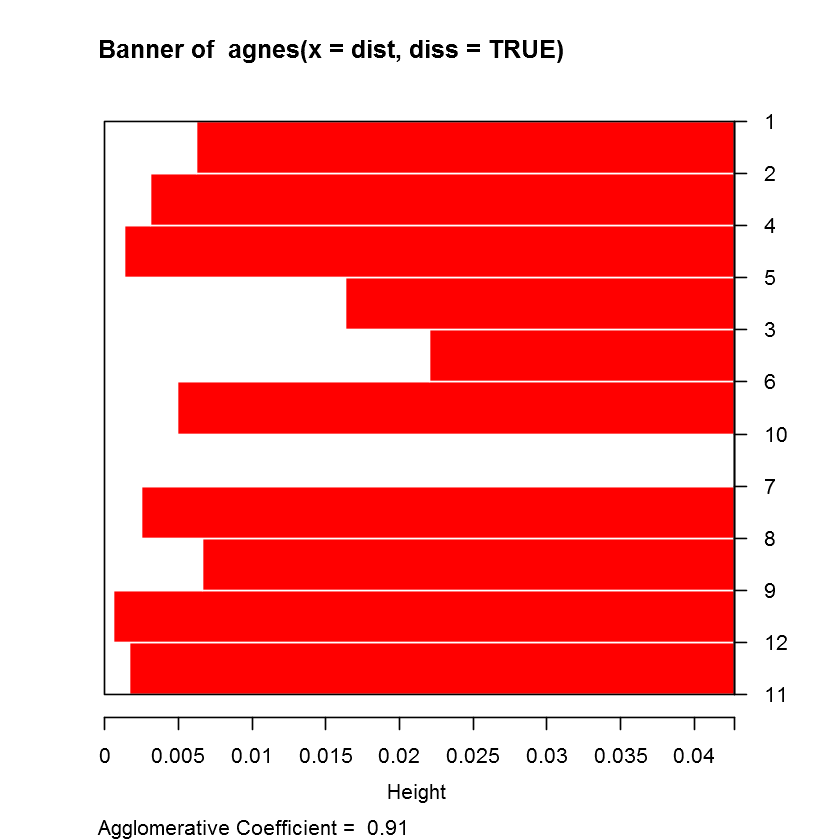

Medoids:
     ID   
[1,]  4  4
[2,] 12 12
Clustering vector:
 [1] 1 1 1 1 1 1 2 2 2 1 2 2
Objective function:
      build        swap 
0.011822398 0.006374134 

Available components:
[1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
[6] "clusinfo"   "silinfo"    "diss"       "call"      

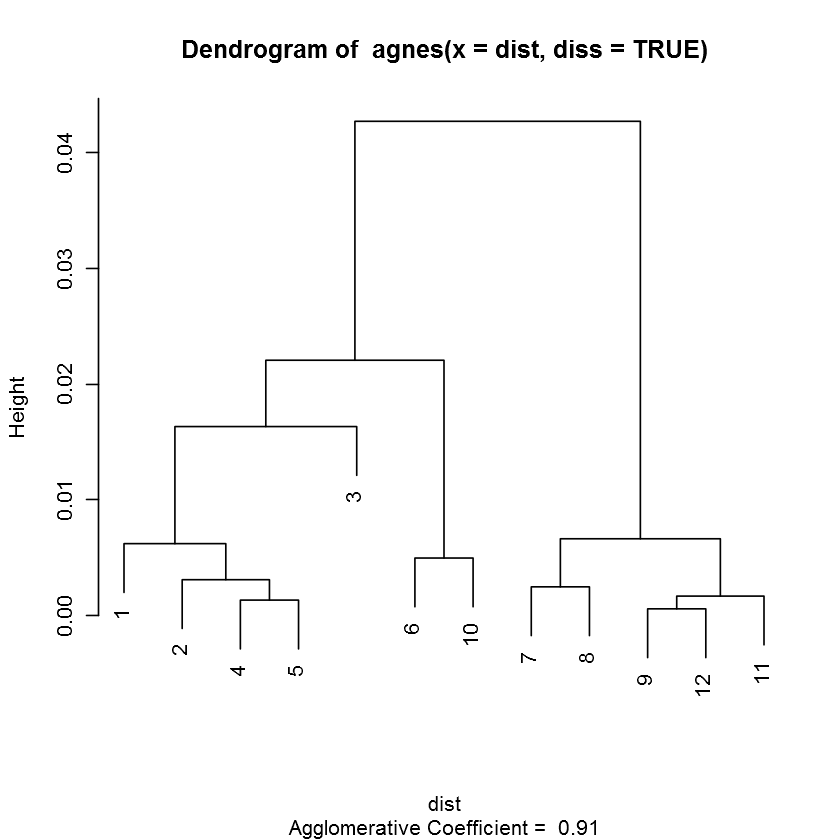

In [99]:
dist = diss
plot(agnes(dist, diss=TRUE))
pam(dist, 2, diss=TRUE)

Compare the total tweets in June in utc time vs timezone shifted (red).

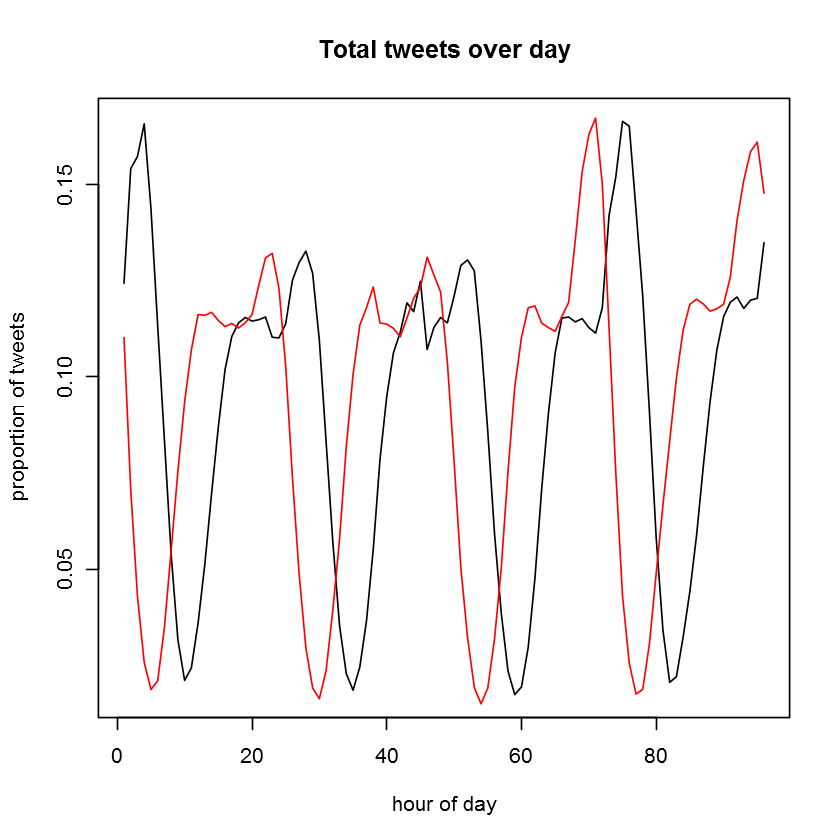

In [71]:
s1 = june_tot[49:(24*6)]
s2 = june_loc[49:(24*6)]
plot(s1/norm(s1, type='2'), type='l', xlab='hour of day', ylab='proportion of tweets', main='Total tweets over day')
lines(s2/norm(s2, type='2'), col='red')

In [79]:
d= phase_dist(4)(s1, s2)

The phase difference is roughly 5.3 hours, so mostly EST tweets... (why)

In [80]:
d*24

[1] 5.334637

% of Alcohol keyword tweets in sept

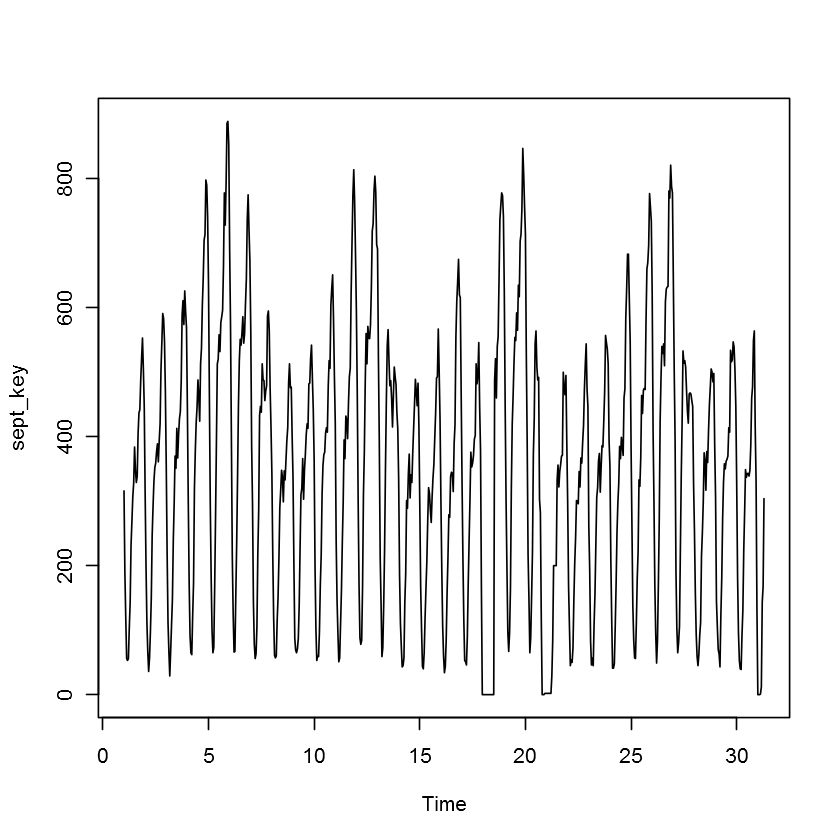

In [101]:
plot(sept_key, type='l')

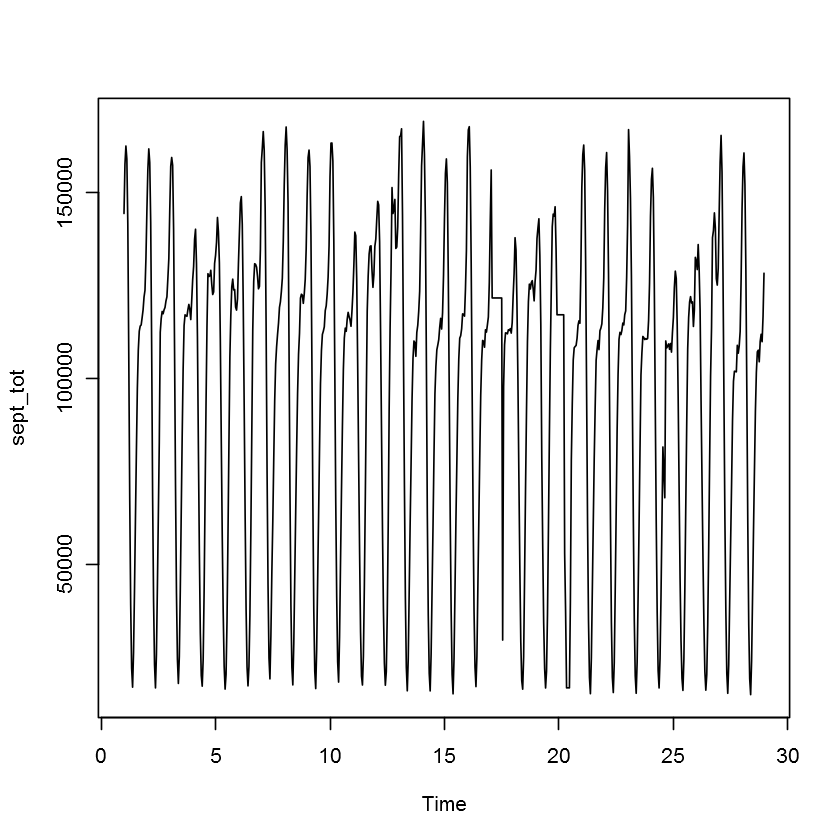

In [4]:
plot(sept_tot)